In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
sns.set(style="darkgrid")
def convert_to_number(series,start=0):
    return series.loc[start:].replace(to_replace=r'[,]',value='.', regex=True).astype(float)

# Parsowanie danych 



In [3]:
df = pd.read_csv("../../data/56/dane56.csv")
df['czas [s]'] = convert_to_number(df['czas [s]'])
df['temp zimnego'] = convert_to_number(df['temp zimnego'])
df['temp cieplego'] = convert_to_number(df['temp cieplego'])
df['start I [A]'] = convert_to_number(df['start I [A]'])
df['moc [W]'] = convert_to_number(df['moc [W]'])

In [4]:
list_of_serires = [df['czas [s]'], df['temp zimnego'], df['temp cieplego'], df['start I [A]'], df['moc [W]']]
df_var = pd.DataFrame().join(list_of_serires, how='outer')
for i in list_of_serires:
    df = df.drop(i.name, axis=1)
df = df.dropna()

## Wykresy


In [5]:
df_var


,czas [s],temp zimnego,temp cieplego,start I [A],moc [W]
0,0.0,23.8,24.7,1.0,4.0
1,30.0,22.3,25.1,1.5,6.0
2,60.0,21.1,25.0,2.0,8.0
3,90.0,20.2,25.2,2.5,10.0
4,120.0,20.0,25.5,3.0,12.0
5,150.0,19.7,25.6,3.5,14.0
6,180.0,19.6,25.4,4.0,16.0
7,210.0,19.3,25.1,4.5,18.0
8,240.0,18.7,24.8,5.0,20.0
9,270.0,18.5,24.5,5.5,22.0


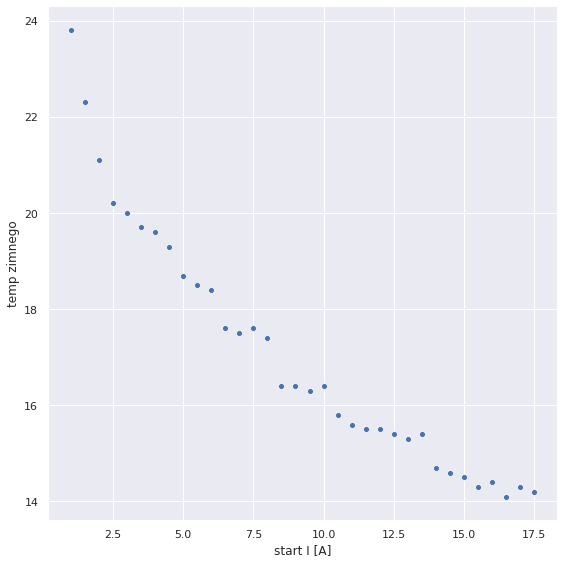

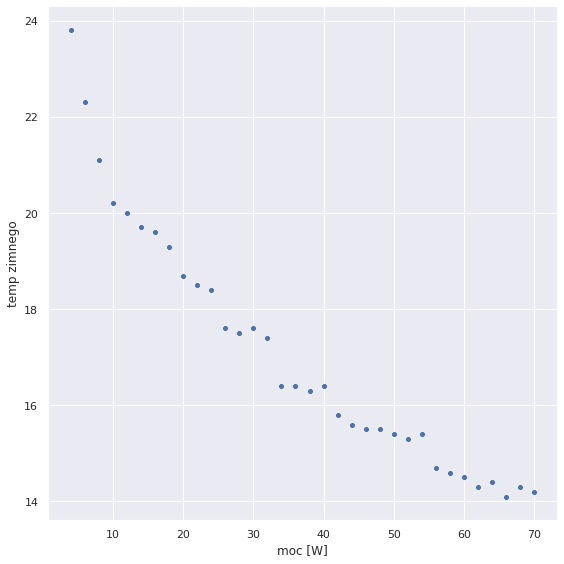

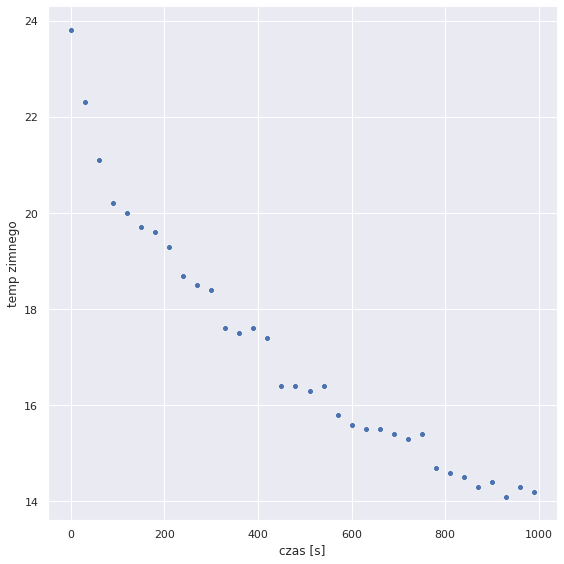

In [14]:
sns.relplot(x='start I [A]', y='temp zimnego',height=8, data=df_var)
sns.relplot(x='moc [W]', y='temp zimnego',height=8, data=df_var)
sns.relplot(x='czas [s]', y='temp zimnego',height=8, data=df_var)


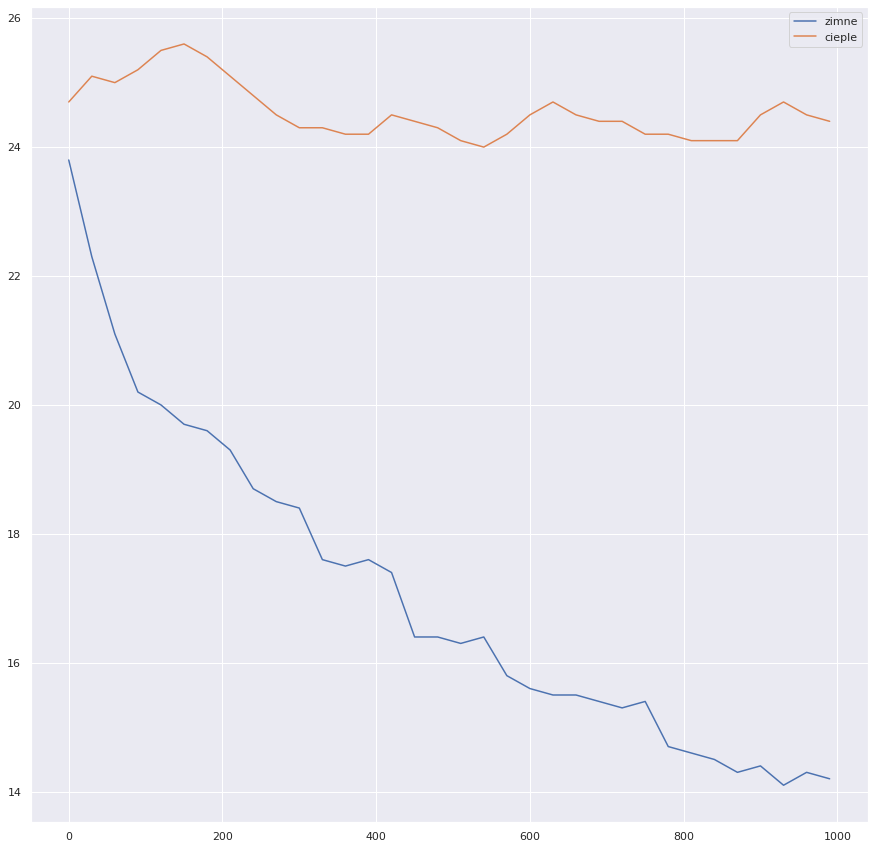

In [10]:
plt.figure(figsize=(15, 15))
legend_element1, = plt.plot(df_var['czas [s]'].to_numpy(), df_var['temp zimnego'].to_numpy(),label='zimne')
legend_element2, = plt.plot(df_var['czas [s]'].to_numpy(), df_var['temp cieplego'].to_numpy(),label='cieple')
plt.legend(handles=[legend_element1, legend_element2])
plt.show()



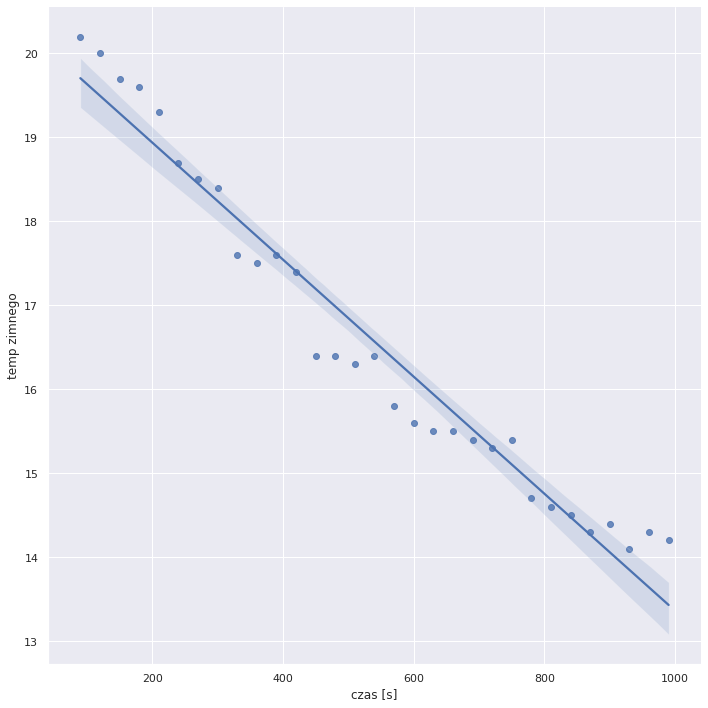

In [19]:
sns.lmplot(x='czas [s]', y='temp zimnego', data=df_var[3:],height=10)


In [44]:
model_linear = np.poly1d(np.polyfit(df_var['czas [s]'],df_var['temp zimnego'],1))
model_pol_2 = np.poly1d(np.polyfit(df_var['czas [s]'],df_var['temp zimnego'],2))
model_pol_3 = np.poly1d(np.polyfit(df_var['czas [s]'],df_var['temp zimnego'],3))
line = np.linspace(0, df_var['czas [s]'].max(), df_var['czas [s]'].size) 

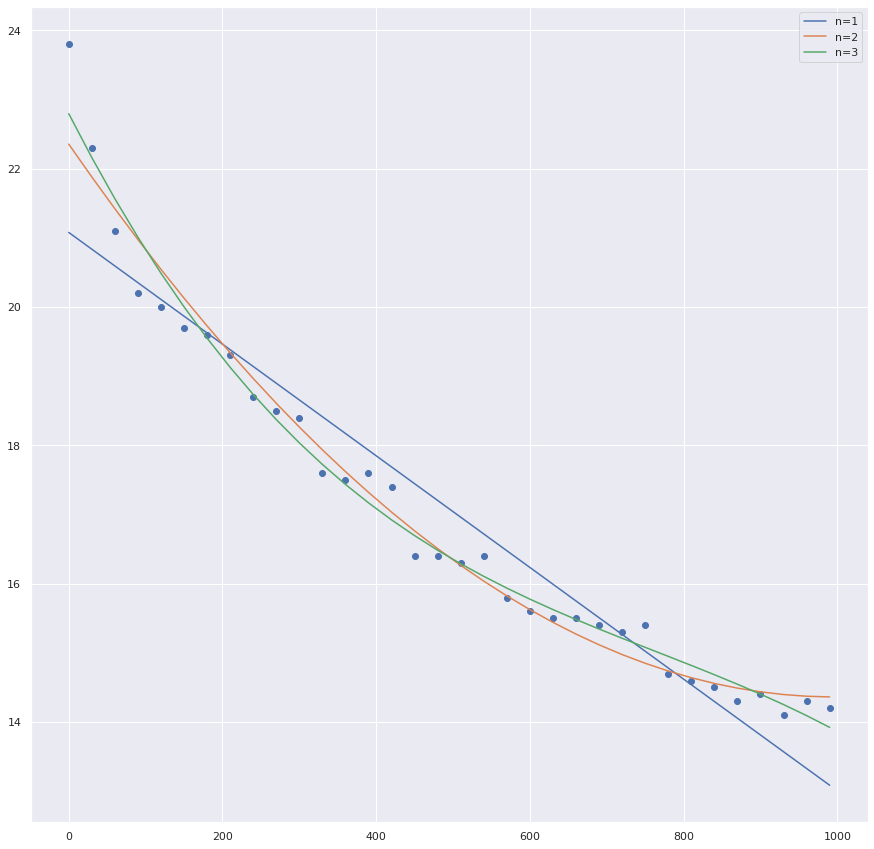

In [49]:
plt.figure(figsize=(15, 15))
plt.scatter(df_var['czas [s]'], df_var['temp zimnego'])
lab1, =plt.plot(line, model_linear(line), label="n=1")
lab2, = plt.plot(line, model_pol_2(line), label="n=2")
lab3, = plt.plot(line, model_pol_3(line), label="n=3")
plt.legend(handles=[lab1, lab2, lab3])
plt.show()

In [38]:
def fun(_x, _a,):
    return _a*np.power(_x, 2)
x = df_var['czas [s]'].to_numpy()  # I[A]
y = df_var['temp zimnego'].to_numpy()
popt, pcov = curve_fit(fun, x, y)  #
my_model = np.poly1d([popt[0], 0, 0])
print(my_model)

         2
2.5e-05 x


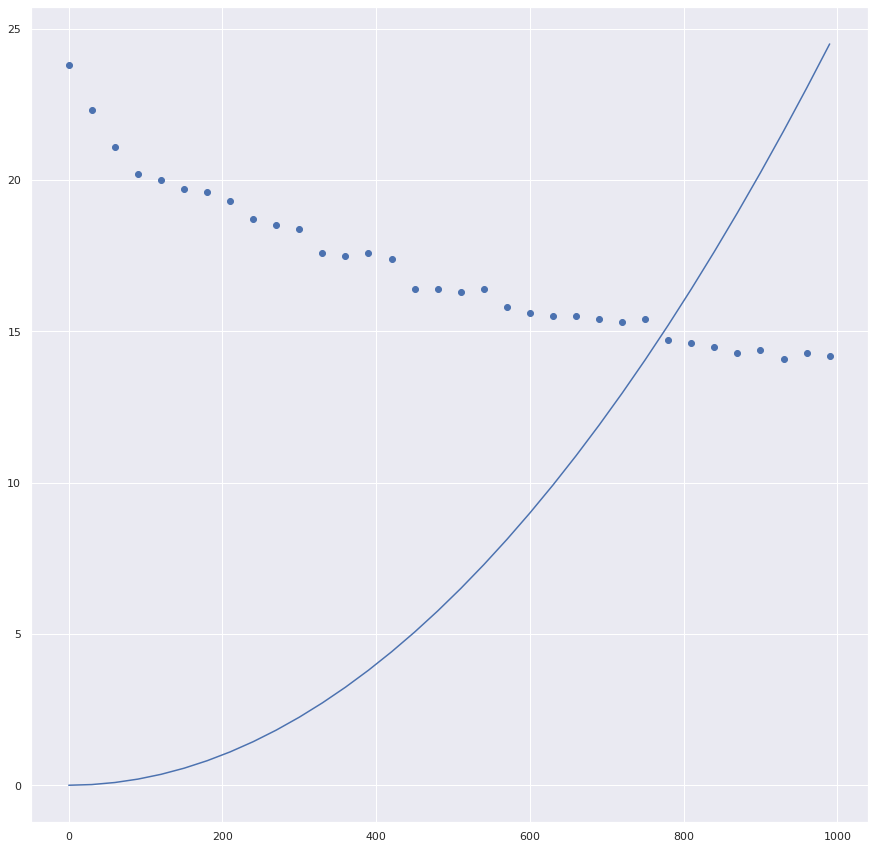

In [39]:
plt.figure(figsize=(15, 15))
plt.scatter(df_var['czas [s]'], df_var['temp zimnego'])
plt.plot(line, my_model(line))

In [50]:
print(model_linear.deriv())
print(model_pol_2.deriv()(0))
print(model_pol_3.deriv()(0))


 
-0.008073
-0.016053905653170376
-0.0218231467223404
